In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.neural_network import MLPClassifier
import pickle

In [2]:
df = pd.read_csv("nsl-kdd/KDDTrain+.txt")

In [3]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [4]:
df.columns = columns
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [5]:
df.nunique()


duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

# Data Preprocessing

In [6]:
# Changing outcomes to 0 for normal, 1 for penetration

df.loc[df['outcome'] == "normal", "outcome"] = 'normal'
df.loc[df['outcome'] != 'normal', "outcome"] = 'attack'
df.loc[df['outcome'] == "normal", "outcome"] = 0
df.loc[df['outcome'] != 0, "outcome"] = 1


In [7]:
cat_cols = ['protocol_type', 'service','flag', 'land','wrong_fragment','urgent','hot', 'num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count'
,'num_failed_logins','logged_in','level','num_compromised','root_shell']
df.drop(cat_cols, axis=1, inplace=True)
X = df.drop('outcome', axis=1)
Y = df['outcome']
Y = Y.astype('int')

In [8]:
sc = StandardScaler()
x = sc.fit_transform(X)

In [9]:
np.save('scaled-input', x)

# Splitting

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2)

In [11]:
x_train.shape

(100777, 22)

In [12]:
x_test.shape

(25195, 22)

# Model Training

In [13]:
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))
    
    train_f1 = metrics.f1_score(y_train, model.predict(X_train))
    test_f1 = metrics.f1_score(y_test, model.predict(X_test))
        
    print(name)
    print(f"Train accuracy: {train_accuracy * 100}, Test Accuracy: {test_accuracy*100}")
    print(f"Train Precision: {train_precision * 100}, Test Precision: {test_precision*100}")
    print(f"Train Recall: {train_recall * 100}, Test Recall: {test_recall*100}")
    print(f"Train F1 Score: {train_f1 * 100}, Test F1 Score: {test_f1*100}")
    
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)    

DecisionTreeClassifier
Train accuracy: 99.99305397064806, Test Accuracy: 99.69438380631077
Train Precision: 99.99786921224776, Test Precision: 99.59866791905047
Train Recall: 99.98721663541843, Test Recall: 99.74345818368394
Train F1 Score: 99.99254264011846, Test F1 Score: 99.67101046784876


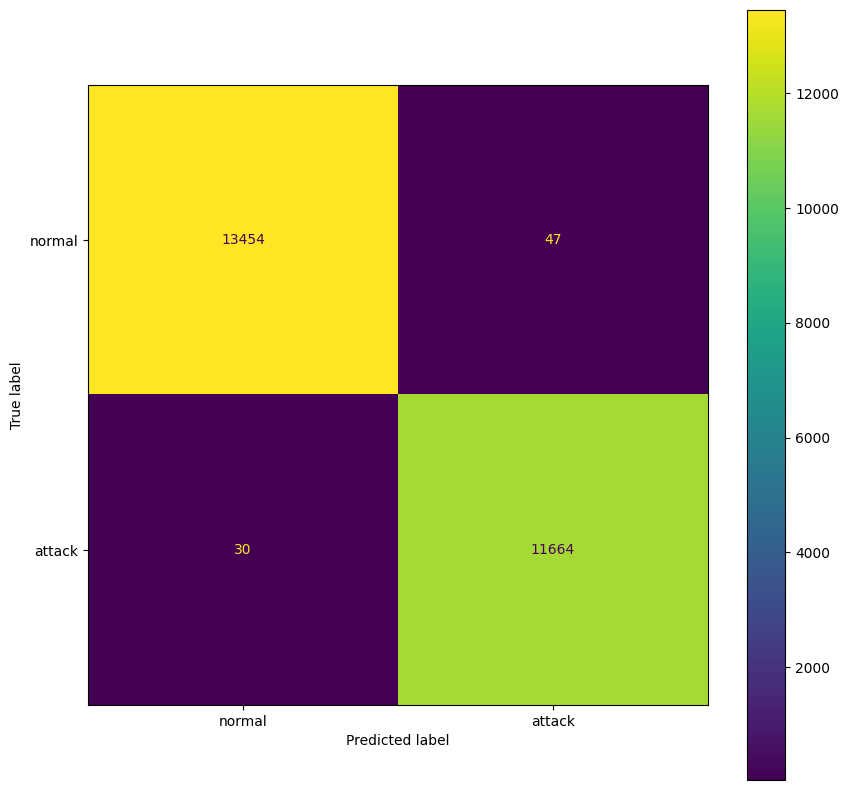

In [14]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
evaluate_classification(model, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

KNeighborsClassifier
Train accuracy: 99.99305397064806, Test Accuracy: 98.82516372296091
Train Precision: 99.99786921224776, Test Precision: 98.55998636673483
Train Recall: 99.98721663541843, Test Recall: 98.91397297759535
Train F1 Score: 99.99254264011846, Test F1 Score: 98.73666239863424


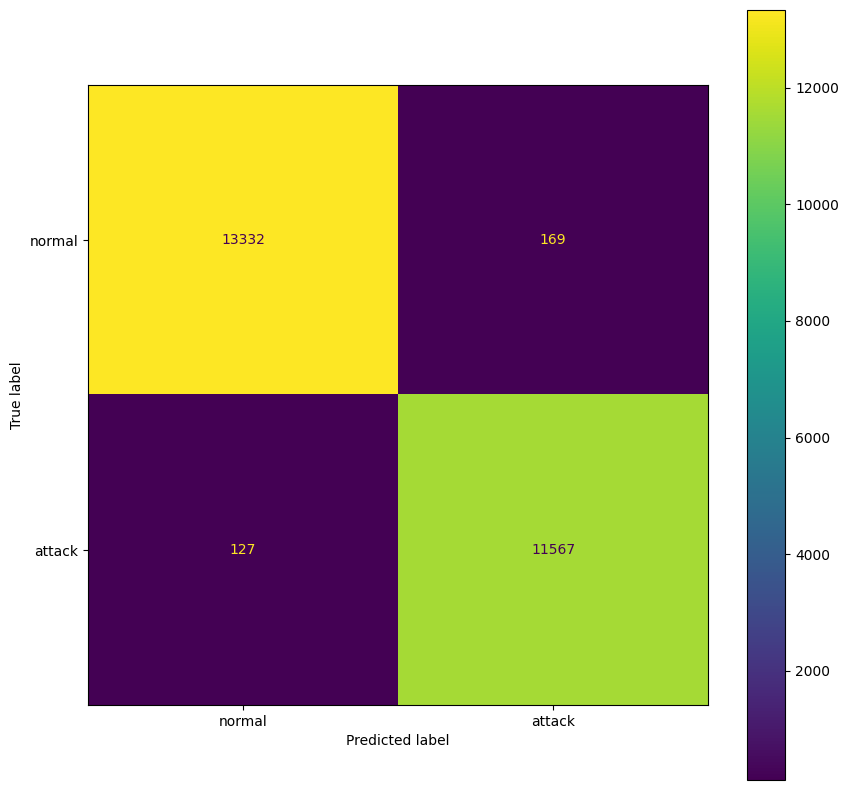

In [15]:
knn_model = KNeighborsClassifier(n_jobs=-1, leaf_size=50, weights='distance')
knn_model.fit(x_train, y_train)
evaluate_classification(knn_model, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

# Saving Model

In [16]:
def save_model(model, filename):
    pickle.dump(model, open(f"{filename}.sav", 'wb'))

In [17]:
save_model(knn_model, "KNN")
save_model(model, "DecisionTreeClassifier")

# Loading the test dataset and testing our model

In [18]:
dataset = pd.read_csv("nsl-kdd/KDDTest+.txt")
dataset.columns = columns

dataset.loc[dataset['outcome'] == "normal", "outcome"] = 'normal'
dataset.loc[dataset['outcome'] != "normal", "outcome"] = 'attack'

dataset.loc[dataset['outcome'] == "normal", "outcome"] = 0
dataset.loc[dataset['outcome'] != 0 , "outcome"] = 1

Y_data = dataset['outcome'].astype('int')
dataset.drop(cat_cols, axis=1, inplace=True)
X_data = dataset.drop('outcome', axis=1)

x_data = sc.fit_transform(X_data)
# x_data = pca.fit_transform(x_data)
X_train, X_test, Y_train, Y_test = train_test_split(x_data, Y_data, test_size=0.5)

KNeighborsClassifier
Train accuracy: 73.0547422588945, Test Accuracy: 74.09510290986515
Train Precision: 92.00879765395894, Test Precision: 92.75939288380194
Train Recall: 58.14671814671814, Test Recall: 58.64401447223533
Train F1 Score: 71.25958171666508, Test F1 Score: 71.85813415574403


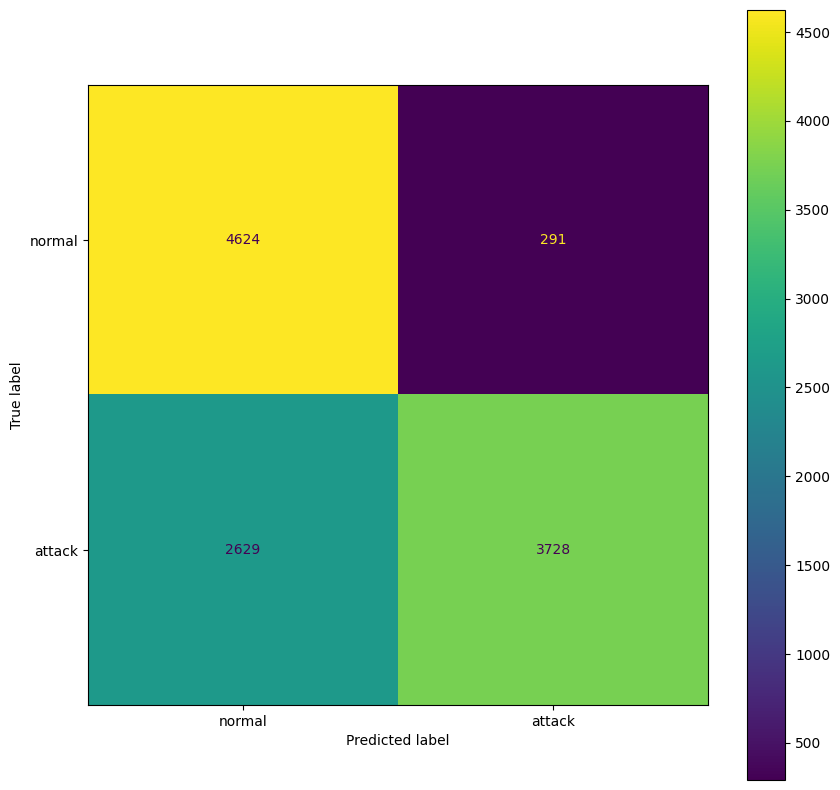

In [19]:
evaluate_classification(knn_model, "KNeighborsClassifier", X_train, X_test, Y_train, Y_test)

In [20]:
MLP = MLPClassifier(hidden_layer_sizes=(7,7,7), alpha=1e-5, max_iter=2000)

In [21]:
MLP.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(7, 7, 7), max_iter=2000)

In [22]:
metrics.accuracy_score(Y_data, MLP.predict(x_data))

0.7688861287317571

In [23]:
x_train.shape

(100777, 22)

C:\Codes\PycharmProjects\Sem4-MiniProj\.venv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 35, but received input with shape (None, 22)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 22), dtype=float32)
  • training=True
  • mask=None